In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
%pwd
os.chdir("../")

In [2]:
path=Path("artifacts/data/raw/train.csv")
path.exists()

True

In [3]:
data_train=pd.read_csv(path)
data_test=pd.read_csv("artifacts/data/raw/test.csv")
data_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [21]:
data.shape

(381109, 12)

In [22]:
data=data.drop("id",axis=1)

In [23]:
data.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [27]:
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [29]:
data["Policy_Sales_Channel"].value_counts()

Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: count, Length: 155, dtype: int64

In [30]:
numerical_data=[column for column in data.columns if data[column].dtype!="O"]
categorical_data=[column for column in data.columns if data[column].dtype=="O"]

In [31]:
data[numerical_data]

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,44,1,28.0,0,40454.0,26.0,217,1
1,76,1,3.0,0,33536.0,26.0,183,0
2,47,1,28.0,0,38294.0,26.0,27,1
3,21,1,11.0,1,28619.0,152.0,203,0
4,29,1,41.0,1,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,30170.0,26.0,88,0
381105,30,1,37.0,1,40016.0,152.0,131,0
381106,21,1,30.0,1,35118.0,160.0,161,0
381107,68,1,14.0,0,44617.0,124.0,74,0


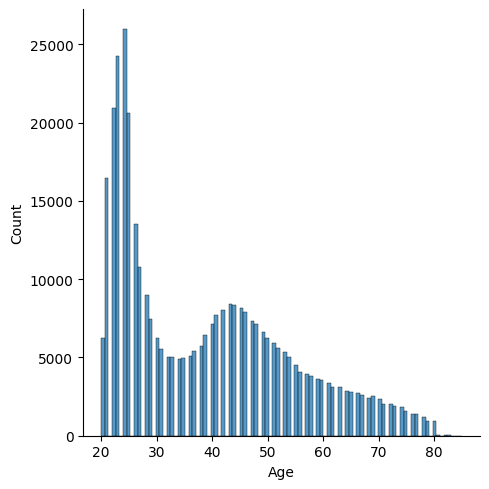

In [34]:
# To know Age which distribution it follow 
sns.displot(data=data,x=data["Age"])

<Axes: xlabel='Age'>

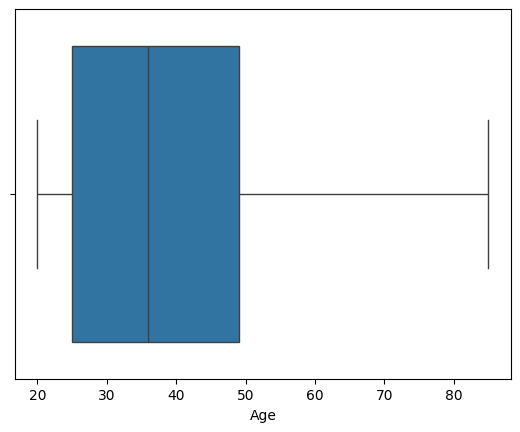

In [37]:
# to checking ouliers 
sns.boxplot(data=data,x=data["Age"])

In [45]:
data[numerical_data]

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,44,1,28.0,0,40454.0,26.0,217,1
1,76,1,3.0,0,33536.0,26.0,183,0
2,47,1,28.0,0,38294.0,26.0,27,1
3,21,1,11.0,1,28619.0,152.0,203,0
4,29,1,41.0,1,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,30170.0,26.0,88,0
381105,30,1,37.0,1,40016.0,152.0,131,0
381106,21,1,30.0,1,35118.0,160.0,161,0
381107,68,1,14.0,0,44617.0,124.0,74,0


In [ ]:
# my claim is already if he/she had insurance , is less likely to bought another insurance.
data.groupby(["Previously_Insured"])["Response"].sum()

Previously_Insured
0    46552
1      158
Name: Response, dtype: int64

In [ ]:
data["Response"].value_counts()#only 158 members are claimed insurance , when he/she has past insurance

Response
0    334399
1     46710
Name: count, dtype: int64

In [52]:
train=data_train

In [53]:
test=data_test

In [54]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [55]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [57]:
train["Gender"].value_counts()

Gender
Male      206089
Female    175020
Name: count, dtype: int64

In [58]:
test["Gender"].value_counts()

Gender
Male      68236
Female    58801
Name: count, dtype: int64

In [59]:
train["Vehicle_Damage"].value_counts()

Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64

In [60]:
test["Vehicle_Damage"].value_counts()

Vehicle_Damage
Yes    63835
No     63202
Name: count, dtype: int64

In [61]:
train["Vehicle_Age"].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [62]:
test["Vehicle_Age"].value_counts()

Vehicle_Age
1-2 Year     66699
< 1 Year     55019
> 2 Years     5319
Name: count, dtype: int64

In [63]:
train.groupby("Vehicle_Age")["Response"].mean()

Vehicle_Age
1-2 Year     0.173755
< 1 Year     0.043705
> 2 Years    0.293746
Name: Response, dtype: float64

In [4]:
data_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
data_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
scaling_features=["Age","Region_Code","Annual_Premium","Policy_Sales_Channel","Vintage"]

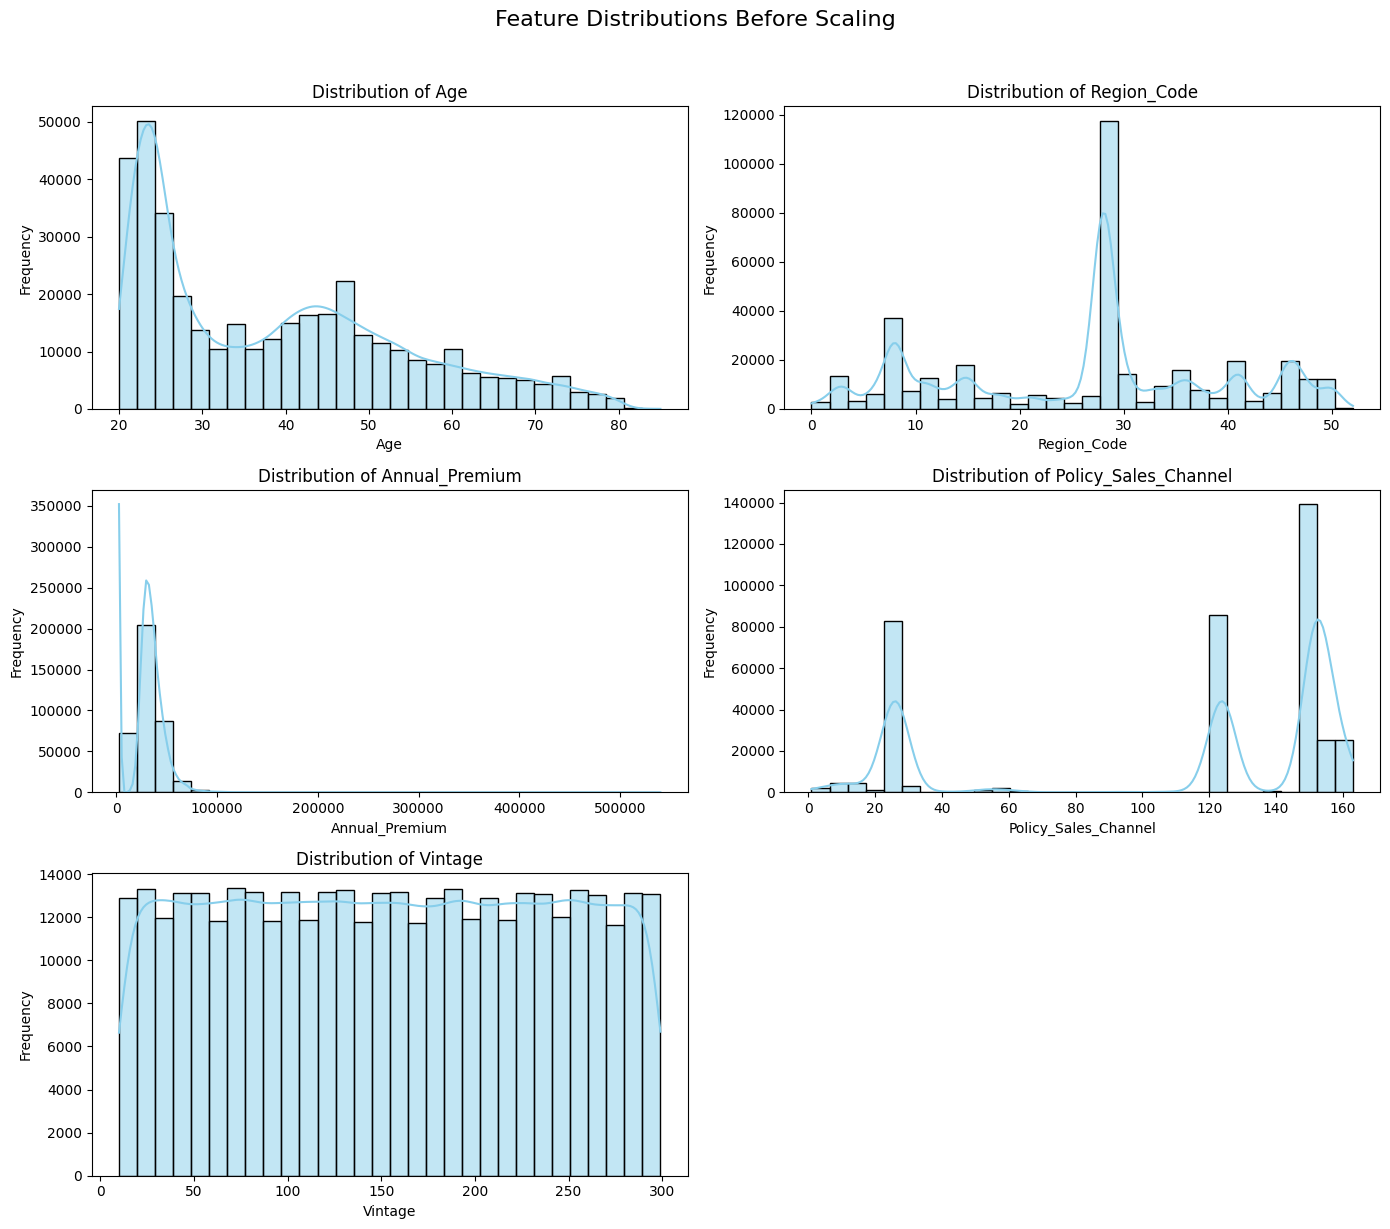

In [10]:
# Setting  up a grid layout
n_cols = 2
n_rows = (len(scaling_features) + 1) // n_cols

plt.figure(figsize=(14, 4 * n_rows))  # Adjust figure size as needed

for idx, column in enumerate(scaling_features, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(data=data_train[column], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.suptitle('Feature Distributions Before Scaling', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [4]:
data_test.shape

(127037, 11)